<a href="https://colab.research.google.com/github/FaldoFajri/tubes-mesinbelajar/blob/main/Final_Code_Model_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/FaldoFajri/tubes-mesinbelajar.git

Cloning into 'tubes-mesinbelajar'...
remote: Enumerating objects: 2534, done.
remote: Counting objects: 100% (2534/2534), done.
remote: Compressing objects: 100% (2492/2492), done.
remote: Total 2534 (delta 25), reused 2534 (delta 25), pack-reused 0
Receiving objects: 100% (2534/2534), 1.49 GiB | 31.86 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Checking out files: 100% (2603/2603), done.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

%matplotlib inline

In [ ]:
test_dir = "/content/tubes-mesinbelajar/dataset/test"
train_dir = "/content/tubes-mesinbelajar/dataset/train"
val_dir = "/content/tubes-mesinbelajar/dataset/val"

In [ ]:
image_shape = (100,100,3)
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [ ]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 128)       3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)             

In [ ]:
#early_stop = EarlyStopping(monitor='val_loss',patience=2, verbose = 1)

best_model_path = 'Model2data.h5'
checkpoint_callback = ModelCheckpoint(best_model_path, monitor='val_accuracy', save_best_only=True, verbose=1)
batch_size = 64

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_dir,
                                               target_size=(100,100),
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 1511 images belonging to 2 classes.


In [ ]:
val_image_gen = image_gen.flow_from_directory(val_dir,
                                               target_size=(100,100),
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 215 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_dir,
                                               target_size=(100,100),
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 432 images belonging to 2 classes.


In [ ]:
print(train_image_gen.class_indices)
print(val_image_gen.class_indices)

{'covid': 0, 'normal': 1}
{'covid': 0, 'normal': 1}


In [ ]:
results = model.fit(train_image_gen,epochs=100,
                              validation_data=val_image_gen,
                             callbacks=[checkpoint_callback])

Epoch 1/100
24/24 [==============================] - 101s 4s/step - loss: 0.5563 - accuracy: 0.7167 - val_loss: 0.4404 - val_accuracy: 0.7349

Epoch 00001: val_accuracy improved from -inf to 0.73488, saving model to Model2data.h5
Epoch 2/100
24/24 [==============================] - 27s 1s/step - loss: 0.3279 - accuracy: 0.8564 - val_loss: 0.1828 - val_accuracy: 0.9395

Epoch 00002: val_accuracy improved from 0.73488 to 0.93953, saving model to Model2data.h5
Epoch 3/100
24/24 [==============================] - 27s 1s/step - loss: 0.2382 - accuracy: 0.9126 - val_loss: 0.1505 - val_accuracy: 0.9628

Epoch 00003: val_accuracy improved from 0.93953 to 0.96279, saving model to Model2data.h5
Epoch 4/100
24/24 [==============================] - 27s 1s/step - loss: 0.2074 - accuracy: 0.9252 - val_loss: 0.1303 - val_accuracy: 0.9674

Epoch 00004: val_accuracy improved from 0.96279 to 0.96744, saving model to Model2data.h5
Epoch 5/100
24/24 [==============================] - 27s 1s/step - loss: 0

24/24 [==============================] - 28s 1s/step - loss: 0.0484 - accuracy: 0.9808 - val_loss: 0.0668 - val_accuracy: 0.9814

Epoch 00041: val_accuracy did not improve from 0.99535
Epoch 42/100
24/24 [==============================] - 28s 1s/step - loss: 0.0401 - accuracy: 0.9887 - val_loss: 0.0173 - val_accuracy: 0.9907

Epoch 00042: val_accuracy did not improve from 0.99535
Epoch 43/100
24/24 [==============================] - 28s 1s/step - loss: 0.0377 - accuracy: 0.9874 - val_loss: 0.0424 - val_accuracy: 0.9767

Epoch 00043: val_accuracy did not improve from 0.99535
Epoch 44/100
24/24 [==============================] - 30s 1s/step - loss: 0.0590 - accuracy: 0.9801 - val_loss: 0.0533 - val_accuracy: 0.9814

Epoch 00044: val_accuracy did not improve from 0.99535
Epoch 45/100
24/24 [==============================] - 30s 1s/step - loss: 0.0434 - accuracy: 0.9841 - val_loss: 0.0713 - val_accuracy: 0.9721

Epoch 00045: val_accuracy did not improve from 0.99535
Epoch 46/100
24/24 [===

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.556255,0.716744,0.440400,0.734884
1,0.327895,0.856386,0.182845,0.939535
2,0.238209,0.912641,0.150497,0.962791
3,0.207404,0.925215,0.130300,0.967442
4,0.177849,0.946393,0.123440,0.962791
...,...,...,...,...
95,0.031143,0.990735,0.012980,0.995349
96,0.027321,0.989411,0.018985,0.995349
97,0.032153,0.988749,0.015805,0.990698
98,0.033326,0.988749,0.031400,0.976744


<AxesSubplot:>

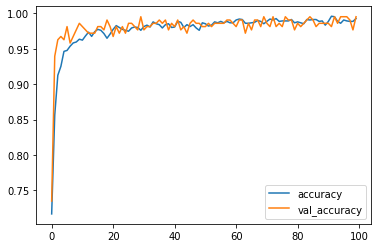

In [ ]:
loss_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

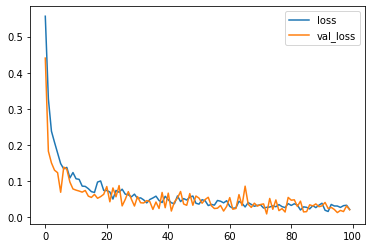

In [ ]:
loss_df[['loss', 'val_loss']].plot()

In [ ]:
model.evaluate(test_image_gen)

7/7 [==============================] - 23s 4s/step - loss: 0.0151 - accuracy: 0.9954


[0.015124051831662655, 0.9953703880310059]

In [ ]:
predictions = np.argmax(model.predict(test_image_gen), axis = -1)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       116
           1       0.99      0.99      0.99       316

    accuracy                           0.99       432
   macro avg       0.99      0.99      0.99       432
weighted avg       0.99      0.99      0.99       432



[[114   2]
 [  2 314]]


<AxesSubplot:>

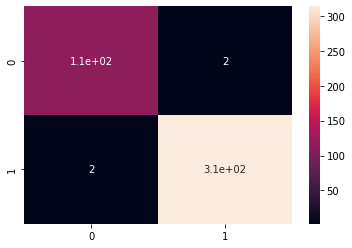

In [ ]:
print(confusion_matrix(test_image_gen.classes,predictions))
sns.heatmap(confusion_matrix(test_image_gen.classes,predictions), annot = True)